In [1]:
import PIL
import requests
import torch
from io import BytesIO

from diffusers import StableDiffusionInpaintPipeline


pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")


/home/tlips/.conda/envs/dsd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
model_index.json: 100%|██████████| 548/548 [00:00<00:00, 2.53MB/s]
unet/diffusion_pytorch_model.safetensors not found
Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]


config.json: 100%|██████████| 748/748 [00:00<00:00, 444kB/s]


Fetching 16 files:   6%|▋         | 1/16 [00:00<00:03,  3.95it/s]

scheduler/scheduler_config.json: 100%|██████████| 313/313 [00:00<00:00, 700kB/s]





(…)ature_extractor/preprocessor_config.json: 100%|██████████| 342/342 [00:00<00:00, 934kB/s]


tokenizer/merges.txt: 100%|██████████| 525k/525k [00:00<00:00, 3.55MB/s]



tokenizer/special_tokens_map.json: 100%|██████████| 472/472 [00:00<00:00, 1.26MB/s]


tokenizer/tokenizer_config.json: 100%|██████████| 806/806 [00:00<00:00, 3.28MB/s]


tok

unet/diffusion_pytorch_model.safetensors not found
Loading pipeline components...: 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]


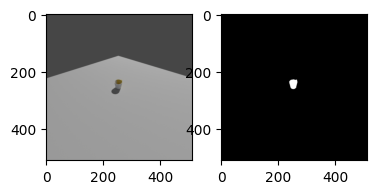

In [11]:
from dsd import DATA_DIR
from PIL import Image

render_path = DATA_DIR / "renders/mugs/test"
rgb_image = Image.open(render_path / "rgb.png").convert("RGB")
mask_image = Image.open(render_path / "segmentation.png").convert("RGB")
import matplotlib.pyplot as plt

# show original image, depth image and cannied depth image
plt.subplot(1, 3, 1)
plt.imshow(rgb_image)
plt.subplot(1, 3, 2)
plt.imshow(mask_image)



In [16]:
prompt = "a blue coffee mug"

images = pipe(prompt=prompt, image=rgb_image, mask_image=mask_image, num_images_per_prompt=4).images

100%|██████████| 50/50 [00:07<00:00,  6.72it/s]


Text(0.5, 1.0, 'Prompted 4')

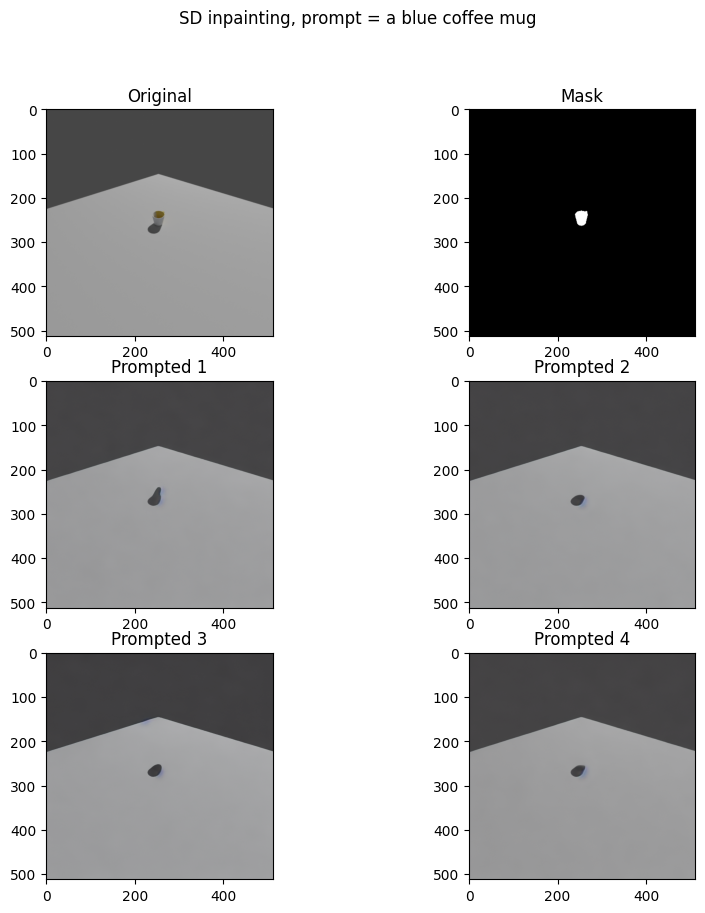

In [17]:
## show results next to the original image and the cannied image
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
# set the title
fig.suptitle(f"SD inpainting, prompt = {prompt}")
axs[0, 0].imshow(rgb_image)
axs[0, 0].set_title("Original")
axs[0, 1].imshow(mask_image)
axs[0, 1].set_title("Mask")
axs[1, 0].imshow(images[0])
axs[1, 0].set_title("Prompted 1")
axs[1, 1].imshow(images[1])
axs[1, 1].set_title("Prompted 2")
axs[2, 0].imshow(images[2])
axs[2, 0].set_title("Prompted 3")
axs[2, 1].imshow(images[3])
axs[2, 1].set_title("Prompted 4")